*ASSIGNMENT 2*

**BMDP RATHNAYAKE**

**D/ENG/21/0046/ET**

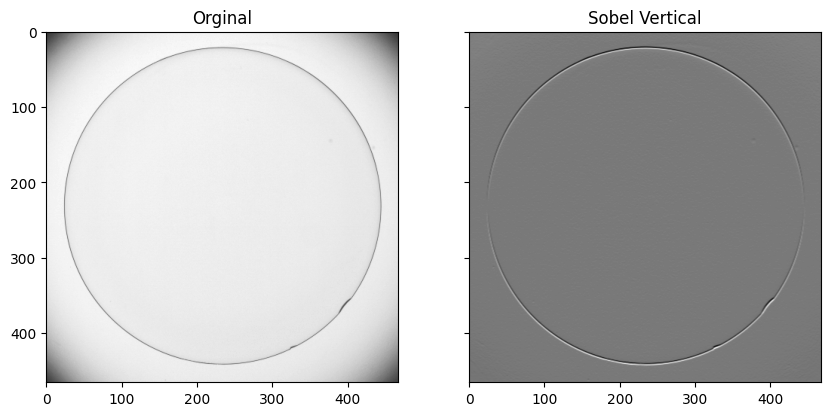

In [3]:
#QUESTION 1

#Sobel Vertical
%matplotlib inline 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/contactlens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],np.float32)
imgc=cv.filter2D(img.astype('float'),-1,kernel)
imgc=cv.normalize(imgc.astype('float'),None,0,255.0,cv.NORM_MINMAX)

fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(10,20))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Orginal')
ax[1].imshow(imgc,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Sobel Vertical')
plt.show()

**1.b**

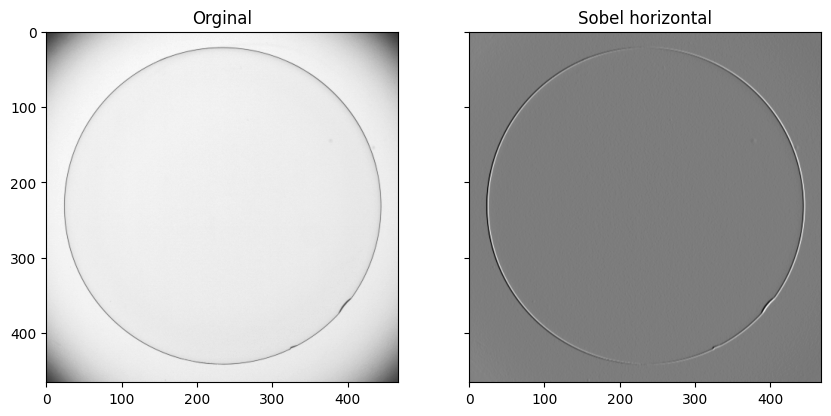

In [4]:
#Sobel horizontal
%matplotlib inline 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/contactlens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],np.float32)
imgc=cv.filter2D(img.astype('float'),-1,kernel)
imgc=cv.normalize(imgc.astype('float'),None,0,255.0,cv.NORM_MINMAX)

fig,ax=plt.subplots(1,2,sharex='all',sharey='all',figsize=(10,20))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Orginal')
ax[1].imshow(imgc,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Sobel horizontal')
plt.show()

**1.c**

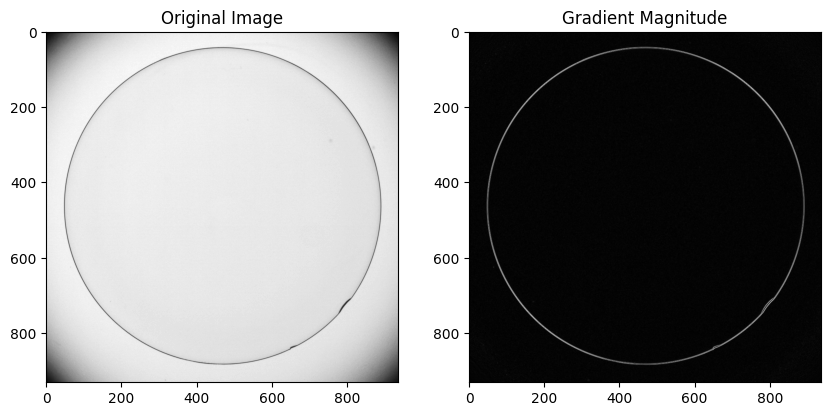

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded the image into a numpy array called "image"
# Compute the gradient in the x and y direction
image = cv.imread('images/contactlens.tif',cv.IMREAD_GRAYSCALE)
fx = np.gradient(image)[0]
fy = np.gradient(image)[1]

# Compute the gradient magnitude
gradient_mag = np.abs(fx) + np.abs(fy)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image in the first subplot
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

# Display the gradient magnitude in the second subplot
axs[1].imshow(gradient_mag, cmap='gray')
axs[1].set_title('Gradient Magnitude')

# Show the figure
plt.show()


